# Project 2 - Food Delivery System using Clustering

## 23AIML052 - Hriday Patel


### Goal : To explore and analyze customer preferences and behaviors within food delivery services using exploratory data analysis (EDA) and clustering methods


In [1]:
# Import essential libraries for data manipulation, visualization, and machine learning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
# Load the food delivery dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\food_delivery.csv")
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [4]:
df.shape

(500, 7)

In [6]:
df.isna().sum()

UserID                0
Age                   0
TotalOrders           0
AverageSpend          0
FavoriteCuisine       0
DeliveryRating        0
AppUsageTimePerDay    0
dtype: int64

In [7]:
df.drop_duplicates().sum()

UserID                                                           125250
Age                                                               19663
TotalOrders                                                       14857
AverageSpend                                                  153292.34
FavoriteCuisine       MexicanMexicanMexicanThaiItalianMexicanChinese...
DeliveryRating                                                   1879.7
AppUsageTimePerDay                                              46757.7
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,500.0,250.50000,144.481833,1.0,125.750,250.50,375.250,500.00
Age,500.0,39.32600,12.200386,18.0,29.000,41.00,50.000,59.00
TotalOrders,500.0,29.71400,5.747196,14.0,25.000,30.00,33.000,47.00
AverageSpend,500.0,306.58468,74.732407,80.9,256.685,305.17,355.870,539.48
DeliveryRating,500.0,3.75940,0.731794,2.5,3.100,3.80,4.400,5.00
AppUsageTimePerDay,500.0,93.51540,48.472478,10.1,49.325,93.10,137.275,179.90


In [9]:
# Analyze the FavoriteCuisine column by counting value frequencies to reveal cuisine popularity.
df['FavoriteCuisine'].value_counts()

FavoriteCuisine
Thai       108
Italian    106
Indian     104
Mexican     95
Chinese     87
Name: count, dtype: int64

In [10]:
# Encode 'FavoriteCuisine' into numeric codes
df['FavoriteCuisine'] = df['FavoriteCuisine'].map({
    'Thai': 0,
    'Italian': 1,
    'Indian': 2,
    'Mexican': 3,
    'Chinese': 4
})

# Count the number of occurrences for each cuisine code
cuisine_counts = df['FavoriteCuisine'].value_counts()

print(cuisine_counts)

FavoriteCuisine
0    108
1    106
2    104
3     95
4     87
Name: count, dtype: int64


In [11]:
# Compute correlation matrix between numeric features
corr = df.corr()
corr

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
UserID,1.000000,0.043303,0.081743,0.037925,0.022466,0.035729,0.023503
Age,0.043303,1.000000,0.044117,0.009313,0.009549,0.077397,0.041644
TotalOrders,0.081743,0.044117,1.000000,0.033607,-0.041441,-0.025495,-0.037582
AverageSpend,0.037925,0.009313,0.033607,1.000000,-0.134597,-0.056125,-0.065401
FavoriteCuisine,0.022466,0.009549,-0.041441,-0.134597,1.000000,0.017919,0.057123
DeliveryRating,0.035729,0.077397,-0.025495,-0.056125,0.017919,1.000000,0.032841
AppUsageTimePerDay,0.023503,0.041644,-0.037582,-0.065401,0.057123,0.032841,1.000000


<Axes: >

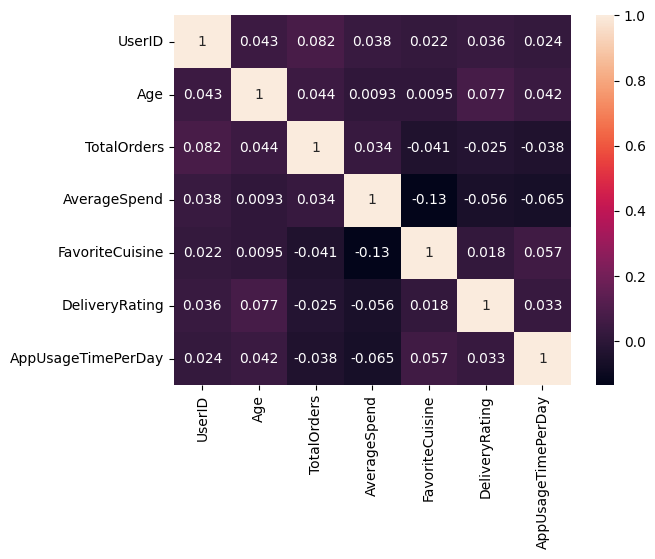

In [12]:
sns.heatmap(corr, annot=True)

<h3>Most variables exhibit low to moderate correlation, indicating that the features are relatively independent. This is beneficial for clustering, as it suggests that each feature can contribute unique information to help distinguish different customer groups.

In [13]:
# Drop non-numeric identifier column 
X = df.drop(['UserID'], axis=1)

In [14]:
# Standardize features to normalize the scale for PCA and clustering
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc.shape

(500, 6)

In [15]:
# Reduce dimensionality to 2 components for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)
X_pca.shape

(500, 2)

In [18]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

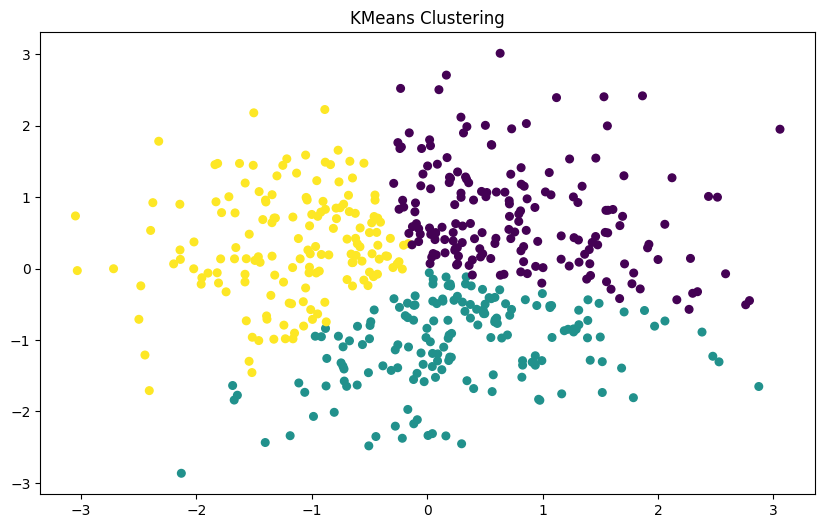

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.title('KMeans Clustering')
plt.show()

<h3>KMeans clustering successfully identified three distinct customer segments based on the PCA-reduced features. The clusters show reasonable separation, indicating that the segmentation is meaningful and can be used for targeted marketing and personalized service strategies.

In [20]:
# Apply Agglomerative (Hierarchical) Clustering to group customers into 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
y_agglo = agglo.fit_predict(X_pca)

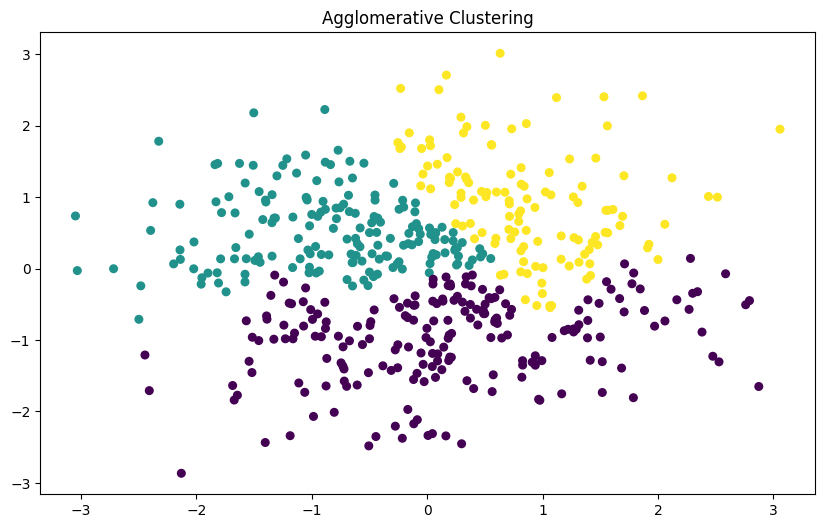

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agglo, cmap='viridis',s=30)
plt.title('Agglomerative Clustering')
plt.show()

<h3>Conclusion:Agglomerative (hierarchical) clustering also reveals clear, distinct customer groups with a structure similar to the KMeans results. This consistency confirms the presence of natural segments in the data and strengthens the reliability of the identified clusters.

In [25]:
# Apply DBSCAN Clustering (density-based, good for detecting noise and outliers)
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_pca)
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

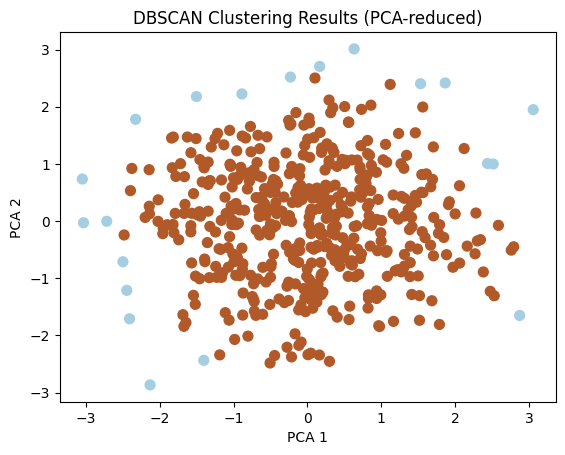

In [27]:
import matplotlib.pyplot as plt

plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_dbscan, cmap='Paired', s=50
)
plt.title('DBSCAN Clustering Results (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Conclusion: DBSCAN detected a few core clusters and treated sparse points as noise. This suggests the presence of outliers or users who don’t fit common patterns.

The analysis and clustering of food delivery customer data revealed valuable insights and meaningful customer segments based on preferences and behaviors.

Key findings:

Cuisine Popularity: Thai and Italian cuisines emerged as the most favored among customers.

Dimensionality Reduction: Applying PCA enabled clear visualization and improved the performance of clustering algorithms.

Clustering Results: Both KMeans and Agglomerative (hierarchical) clustering produced stable, consistent segments, confirming natural grouping tendencies in the data.

Outlier Detection: DBSCAN effectively identified outliers and noise points, providing an additional perspective for anomaly detection.

These insights can help food delivery services develop targeted marketing campaigns, offer personalized recommendations, and better understand distinct customer profiles to enhance customer satisfaction and loyalty.